Epoch 0 - Cost: 0.38554734413938047
Epoch 1000 - Cost: 0.23946876020937458
Epoch 2000 - Cost: 0.1898250537055301
Epoch 3000 - Cost: 0.13144347446184834
Epoch 4000 - Cost: 0.04596551010834202
Epoch 5000 - Cost: 0.016832860014460247
Epoch 6000 - Cost: 0.008781204174560076
Epoch 7000 - Cost: 0.0056011369337856855
Epoch 8000 - Cost: 0.003999499264024124
Epoch 9000 - Cost: 0.003062945503407948

Final Output after training:
[[0.05035392]
 [0.94687409]
 [0.95698317]
 [0.05126862]]

Predicted Output (Binary):
[[0]
 [1]
 [1]
 [0]]


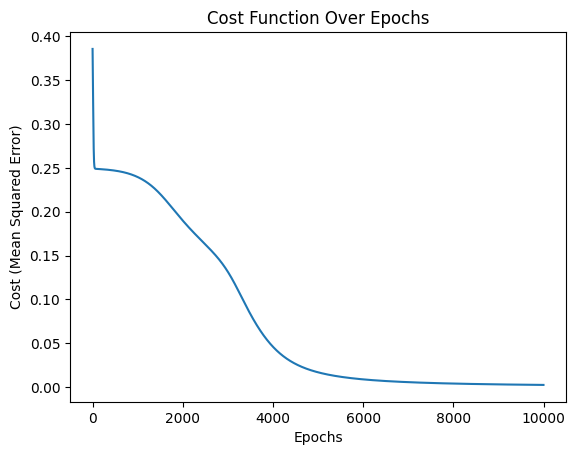

In [ ]:
import numpy as np
import pandas as pd


X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  
y = np.array([[0], [1], [1], [0]])  

np.random.seed(42)

input_layer_size = 2  
hidden_layer_size = 4  
output_layer_size = 1  

weights_input_hidden = np.random.rand(input_layer_size, hidden_layer_size)
weights_hidden_output = np.random.rand(hidden_layer_size, output_layer_size)

bias_hidden = np.random.rand(1, hidden_layer_size)
bias_output = np.random.rand(1, output_layer_size)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

epochs = 10000  
learning_rate = 0.1  

cost_history = []

for epoch in range(epochs):
    hidden_layer_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    output_layer_output = sigmoid(output_layer_input)

    error = y - output_layer_output

    output_layer_gradient = error * sigmoid_derivative(output_layer_output)
    hidden_layer_gradient = output_layer_gradient.dot(weights_hidden_output.T) * sigmoid_derivative(hidden_layer_output)

    weights_hidden_output += hidden_layer_output.T.dot(output_layer_gradient) * learning_rate
    bias_output += np.sum(output_layer_gradient, axis=0, keepdims=True) * learning_rate

    weights_input_hidden += X.T.dot(hidden_layer_gradient) * learning_rate
    bias_hidden += np.sum(hidden_layer_gradient, axis=0, keepdims=True) * learning_rate

    cost = np.mean(np.square(error))
    cost_history.append(cost)

    if epoch % 1000 == 0:
        print(f'Epoch {epoch} - Cost: {cost}')

print("\nFinal Output after training:")
print(output_layer_output)

predicted_output = (output_layer_output > 0.5).astype(int)
print("\nPredicted Output (Binary):")
print(predicted_output)

import matplotlib.pyplot as plt
plt.plot(cost_history)
plt.xlabel('Epochs')
plt.ylabel('Cost (Mean Squared Error)')
plt.title('Cost Function Over Epochs')
plt.show()


In [4]:
#using perceptron rule for classification

In [5]:
df = pd.read_csv('diabetes.csv')
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler


np.random.seed(42)
X = df.iloc[:, :-1].values  
y = df.iloc[:, -1].values.reshape(-1, 1)  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

np.random.seed(42)

input_layer_size = X_train.shape[1]  
hidden_layer_size = 8  
output_layer_size = 1  

weights_input_hidden = np.random.rand(input_layer_size, hidden_layer_size)
weights_hidden_output = np.random.rand(hidden_layer_size, output_layer_size)

bias_hidden = np.random.rand(1, hidden_layer_size)
bias_output = np.random.rand(1, output_layer_size)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

epochs = 5000
learning_rate = 0.1
for epoch in range(epochs):
    hidden_layer_input = np.dot(X_train, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    output_layer_output = sigmoid(output_layer_input)

    error = y_train - output_layer_output

    output_gradient = error * sigmoid_derivative(output_layer_output)
    hidden_gradient = output_gradient.dot(weights_hidden_output.T) * sigmoid_derivative(hidden_layer_output)

    weights_hidden_output += hidden_layer_output.T.dot(output_gradient) * learning_rate
    bias_output += np.sum(output_gradient, axis=0, keepdims=True) * learning_rate

    weights_input_hidden += X_train.T.dot(hidden_gradient) * learning_rate
    bias_hidden += np.sum(hidden_gradient, axis=0, keepdims=True) * learning_rate

    if epoch % 1000 == 0:
        loss = np.mean(np.square(error))
        print(f"Epoch {epoch} - Loss: {loss:.4f}")

hidden_layer_input = np.dot(X_test, weights_input_hidden) + bias_hidden
hidden_layer_output = sigmoid(hidden_layer_input)

output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
output_layer_output = sigmoid(output_layer_input)

y_pred = (output_layer_output > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy:.4f}")


Epoch 0 - Loss: 0.5361
Epoch 1000 - Loss: 0.0816
Epoch 2000 - Loss: 0.0694
Epoch 3000 - Loss: 0.0671
Epoch 4000 - Loss: 0.0657

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.78      0.79       151
           1       0.60      0.61      0.60        80

    accuracy                           0.72       231
   macro avg       0.69      0.70      0.70       231
weighted avg       0.72      0.72      0.72       231

Accuracy: 0.7229
